In [33]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [34]:
data = yf.Ticker("AAPL")

In [35]:
data.info
data.calendar
data.analyst_price_targets
data.quarterly_income_stmt
data.history(period='1mo')
data.option_chain(data.options[0]).calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL251128C00110000,2025-11-06 15:22:28+00:00,110.0,160.95,159.7,163.15,0.0,0.0,NaN,8,4.553715,True,REGULAR,USD
1,AAPL251128C00120000,2025-11-05 17:41:07+00:00,120.0,150.80,149.7,153.15,0.0,0.0,NaN,6,4.158208,True,REGULAR,USD
2,AAPL251128C00125000,2025-11-05 17:54:19+00:00,125.0,145.77,144.7,148.15,0.0,0.0,NaN,2,3.973633,True,REGULAR,USD
3,AAPL251128C00130000,2025-11-06 15:22:28+00:00,130.0,141.01,139.7,143.05,0.0,0.0,NaN,5,3.748048,True,REGULAR,USD
4,AAPL251128C00135000,2025-11-05 17:41:07+00:00,135.0,135.81,134.7,138.10,0.0,0.0,NaN,2,3.601563,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,AAPL251128C00365000,2025-10-31 19:20:50+00:00,365.0,0.01,0.0,0.20,0.0,0.0,5.0,5,1.046880,False,REGULAR,USD
71,AAPL251128C00370000,2025-11-05 16:24:29+00:00,370.0,0.01,0.0,0.20,0.0,0.0,100.0,101,1.087895,False,REGULAR,USD
72,AAPL251128C00375000,2025-11-05 14:34:46+00:00,375.0,0.01,0.0,0.20,0.0,0.0,3.0,5,1.128911,False,REGULAR,USD
73,AAPL251128C00395000,2025-11-07 20:25:10+00:00,395.0,0.01,0.0,0.01,0.0,0.0,1.0,1,0.968750,False,REGULAR,USD


In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader

In [37]:
data_pd = data.history(period='max')

In [38]:
data_pd.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-11-17 00:00:00-05:00,268.820007,270.489990,265.730011,267.459991,45018300,0.0,0.0
2025-11-18 00:00:00-05:00,269.989990,270.709991,265.320007,267.440002,45677300,0.0,0.0
2025-11-19 00:00:00-05:00,265.529999,272.209991,265.500000,268.559998,40424500,0.0,0.0
2025-11-20 00:00:00-05:00,270.829987,275.429993,265.920013,266.250000,45823600,0.0,0.0
2025-11-21 00:00:00-05:00,265.950012,273.329987,265.670013,271.489990,58784100,0.0,0.0


In [39]:
data_pd.reset_index(inplace=True)

In [40]:
data_pd

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.098390,0.098817,0.098390,0.098390,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.093684,0.093684,0.093256,0.093256,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.086839,0.086839,0.086412,0.086412,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.088550,0.088978,0.088550,0.088550,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091118,0.091545,0.091118,0.091118,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
11324,2025-11-17 00:00:00-05:00,268.820007,270.489990,265.730011,267.459991,45018300,0.0,0.0
11325,2025-11-18 00:00:00-05:00,269.989990,270.709991,265.320007,267.440002,45677300,0.0,0.0
11326,2025-11-19 00:00:00-05:00,265.529999,272.209991,265.500000,268.559998,40424500,0.0,0.0
11327,2025-11-20 00:00:00-05:00,270.829987,275.429993,265.920013,266.250000,45823600,0.0,0.0


In [41]:
type(data_pd['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [42]:
data_pd['Date'] = data_pd['Date'].dt.strftime('%Y-%m-%d')

In [43]:
dt = data_pd[['Close']].values

In [44]:
dt

array([[9.83895063e-02],
       [9.32564586e-02],
       [8.64115804e-02],
       ...,
       [2.68559998e+02],
       [2.66250000e+02],
       [2.71489990e+02]], shape=(11329, 1))

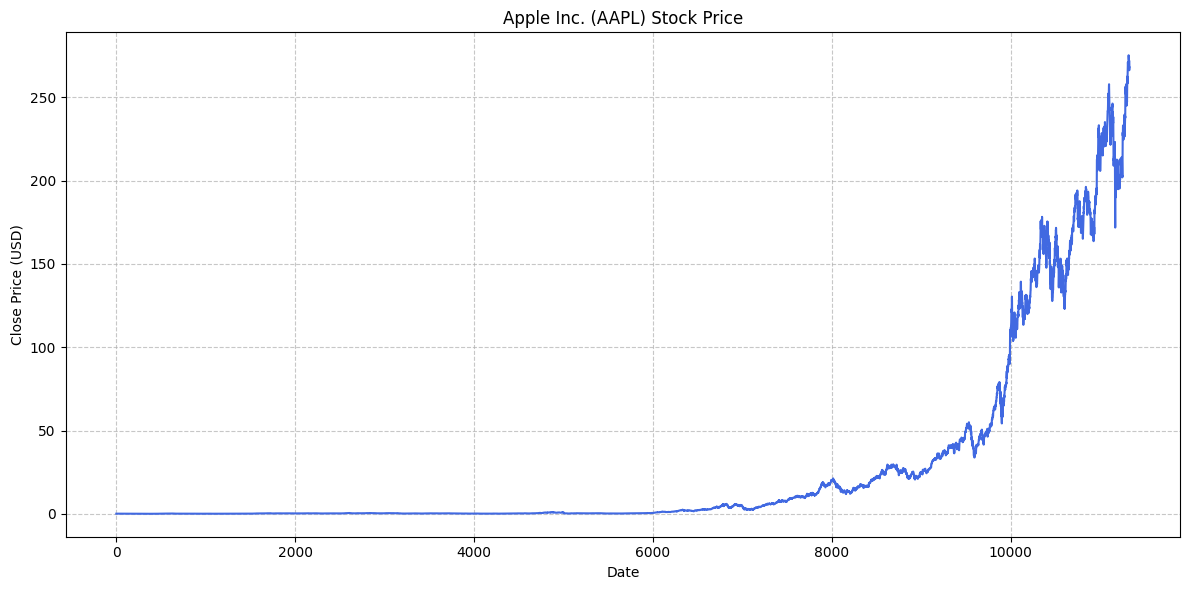

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(dt, color='royalblue', linewidth=1.5)
plt.title('Apple Inc. (AAPL) Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
from lstm import LSTM
from train import train_model, eval_model

In [47]:
device = torch.device("mps") if torch.backends.mps.is_available() else "cpu"
device

device(type='mps')

In [48]:
sclaler = MinMaxScaler(feature_range=(0, 1))
dt = sclaler.fit_transform(dt)
dt

array([[2.20720025e-04],
       [2.02068799e-04],
       [1.77197539e-04],
       ...,
       [9.75691489e-01],
       [9.67297980e-01],
       [9.86337787e-01]], shape=(11329, 1))

In [49]:
threshold = int(0.8 * len(dt))
train_data = dt[:threshold]
test_data = dt[threshold:]
train_data.shape, test_data.shape

((9063, 1), (2266, 1))

In [50]:
window_size = 7
n_train = len(train_data) - window_size
train_data = np.array([train_data[i:i+window_size+1] for i in range(n_train)])
train_data.shape

(9056, 8, 1)

In [51]:
x_train = torch.tensor(train_data[:, :window_size], dtype=torch.float32)
y_train = torch.tensor(train_data[:, window_size], dtype=torch.float32)
x_train.shape, y_train.shape

(torch.Size([9056, 7, 1]), torch.Size([9056, 1]))

In [52]:
n_test = len(test_data) - window_size
test_data = np.array([test_data[i:i+window_size+1] for i in range(n_test)])
test_data.shape

(2259, 8, 1)

In [53]:
x_test = torch.tensor(test_data[:, :window_size], dtype=torch.float32)
y_test = torch.tensor(test_data[:, window_size], dtype=torch.float32)
x_test.shape, y_test.shape

(torch.Size([2259, 7, 1]), torch.Size([2259, 1]))

In [54]:
# Create datasets
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

# Create loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [55]:
x_train.shape[2], y_train.shape[1]

(1, 1)

In [56]:
model = LSTM(input_size=1, hidden_size=64, num_layers=2, output_size=1)
model

LSTM(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [57]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [58]:
train_losses = train_model(model, train_loader, criterion, optimizer, num_epochs=30, device=device)

Epoch 1/30: 100%|██████████| 142/142 [00:01<00:00, 94.12batch/s, loss=3.3e-5]  


Epoch [1/30], Loss: 0.0004


Epoch 2/30: 100%|██████████| 142/142 [00:01<00:00, 131.48batch/s, loss=1.88e-5]


Epoch [2/30], Loss: 0.0000


Epoch 3/30: 100%|██████████| 142/142 [00:01<00:00, 125.81batch/s, loss=2.02e-5]


Epoch [3/30], Loss: 0.0000


Epoch 4/30: 100%|██████████| 142/142 [00:01<00:00, 124.24batch/s, loss=1.4e-6] 


Epoch [4/30], Loss: 0.0000


Epoch 5/30: 100%|██████████| 142/142 [00:01<00:00, 126.77batch/s, loss=2.53e-6]


Epoch [5/30], Loss: 0.0000


Epoch 6/30: 100%|██████████| 142/142 [00:02<00:00, 57.53batch/s, loss=1.25e-5]


Epoch [6/30], Loss: 0.0000


Epoch 7/30: 100%|██████████| 142/142 [00:01<00:00, 109.04batch/s, loss=2.28e-6]


Epoch [7/30], Loss: 0.0000


Epoch 8/30: 100%|██████████| 142/142 [00:01<00:00, 111.04batch/s, loss=1.89e-5]


Epoch [8/30], Loss: 0.0000


Epoch 9/30: 100%|██████████| 142/142 [00:01<00:00, 93.85batch/s, loss=5.85e-6]


Epoch [9/30], Loss: 0.0000


Epoch 10/30: 100%|██████████| 142/142 [00:01<00:00, 122.89batch/s, loss=5.51e-6]


Epoch [10/30], Loss: 0.0000


Epoch 11/30: 100%|██████████| 142/142 [00:01<00:00, 121.03batch/s, loss=7.19e-6]


Epoch [11/30], Loss: 0.0000


Epoch 12/30: 100%|██████████| 142/142 [00:01<00:00, 121.00batch/s, loss=2.32e-6]


Epoch [12/30], Loss: 0.0000


Epoch 13/30: 100%|██████████| 142/142 [00:01<00:00, 136.11batch/s, loss=3.79e-6]


Epoch [13/30], Loss: 0.0000


Epoch 14/30: 100%|██████████| 142/142 [00:01<00:00, 124.48batch/s, loss=7.03e-6]


Epoch [14/30], Loss: 0.0000


Epoch 15/30: 100%|██████████| 142/142 [00:01<00:00, 124.48batch/s, loss=4.77e-6]


Epoch [15/30], Loss: 0.0000


Epoch 16/30: 100%|██████████| 142/142 [00:01<00:00, 132.17batch/s, loss=5.73e-6]


Epoch [16/30], Loss: 0.0000


Epoch 17/30: 100%|██████████| 142/142 [00:01<00:00, 91.00batch/s, loss=2e-6]   


Epoch [17/30], Loss: 0.0000


Epoch 18/30: 100%|██████████| 142/142 [00:01<00:00, 128.29batch/s, loss=5e-6]   


Epoch [18/30], Loss: 0.0000


Epoch 19/30: 100%|██████████| 142/142 [00:01<00:00, 120.77batch/s, loss=4e-6]   


Epoch [19/30], Loss: 0.0000


Epoch 20/30: 100%|██████████| 142/142 [00:01<00:00, 128.20batch/s, loss=6.27e-6]


Epoch [20/30], Loss: 0.0000


Epoch 21/30: 100%|██████████| 142/142 [00:01<00:00, 134.20batch/s, loss=7.5e-6] 


Epoch [21/30], Loss: 0.0000


Epoch 22/30: 100%|██████████| 142/142 [00:01<00:00, 135.84batch/s, loss=3.95e-6]


Epoch [22/30], Loss: 0.0000


Epoch 23/30: 100%|██████████| 142/142 [00:01<00:00, 137.24batch/s, loss=2.75e-6]


Epoch [23/30], Loss: 0.0000


Epoch 24/30: 100%|██████████| 142/142 [00:01<00:00, 136.83batch/s, loss=1.25e-6]


Epoch [24/30], Loss: 0.0000


Epoch 25/30: 100%|██████████| 142/142 [00:01<00:00, 122.90batch/s, loss=1.34e-6]


Epoch [25/30], Loss: 0.0000


Epoch 26/30: 100%|██████████| 142/142 [00:01<00:00, 138.99batch/s, loss=7.04e-6]


Epoch [26/30], Loss: 0.0000


Epoch 27/30: 100%|██████████| 142/142 [00:01<00:00, 130.65batch/s, loss=6.71e-6]


Epoch [27/30], Loss: 0.0000


Epoch 28/30: 100%|██████████| 142/142 [00:01<00:00, 138.56batch/s, loss=1.01e-6]


Epoch [28/30], Loss: 0.0000


Epoch 29/30: 100%|██████████| 142/142 [00:01<00:00, 135.63batch/s, loss=3.62e-6]


Epoch [29/30], Loss: 0.0000


Epoch 30/30: 100%|██████████| 142/142 [00:01<00:00, 141.68batch/s, loss=4.76e-6]


Epoch [30/30], Loss: 0.0000


In [59]:
predicts, actuals, val_losses = eval_model(model, test_loader, criterion, device=device)

Evaluating: 100%|██████████| 36/36 [00:00<00:00, 219.88batch/s]


In [60]:
predicts = sclaler.inverse_transform(np.array(predicts).reshape(-1, 1))
actuals = sclaler.inverse_transform(np.array(actuals).reshape(-1, 1))
predicts, actuals

(array([[129.56367],
        [117.11644],
        [103.3351 ],
        ...,
        [130.54594],
        [138.88231],
        [101.5047 ]], shape=(2259, 1), dtype=float32),
 array([[172.03123],
        [146.42029],
        [123.7696 ],
        ...,
        [168.72067],
        [189.93625],
        [118.05148]], shape=(2259, 1), dtype=float32))

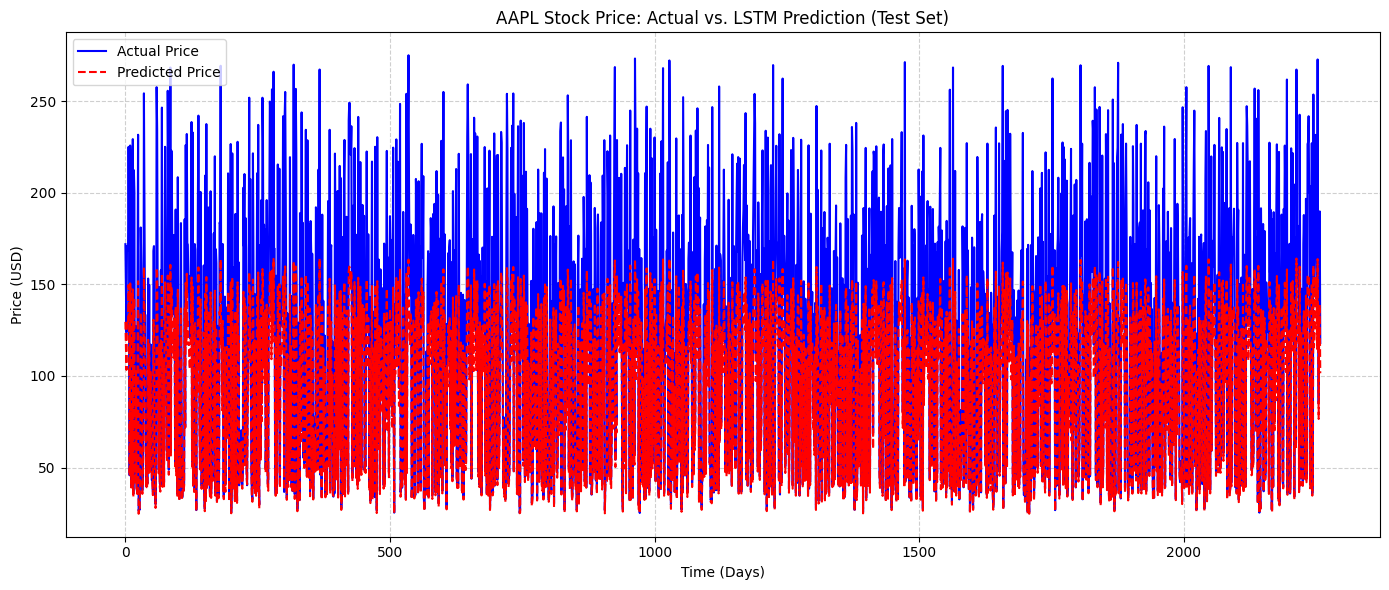

In [61]:
plt.figure(figsize=(14, 6))
plt.plot(actuals, label='Actual Price', color='blue', linewidth=1.5)
plt.plot(predicts, label='Predicted Price', color='red', linestyle='--', linewidth=1.5)
plt.title(f'AAPL Stock Price: Actual vs. LSTM Prediction (Test Set)')
plt.xlabel('Time (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

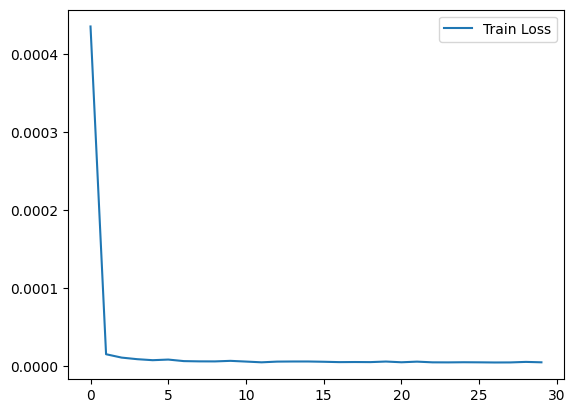

In [62]:
plt.plot(train_losses, label='Train Loss')
# plt.plot(val_losses, label='Validation Loss')
plt.legend()